In [2]:
import torch
import torchvision
from torchvision import transforms, datasets

In [3]:
train = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))

In [6]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [7]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [10]:
x, y = data[0][0], data[1][2]

print(y)

tensor(6)


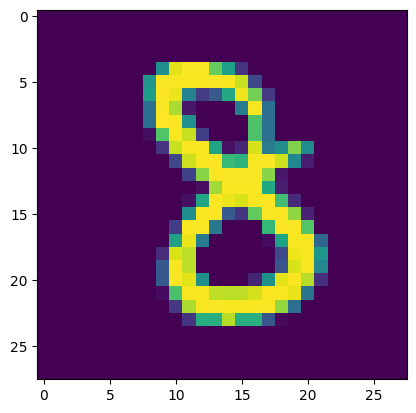

In [20]:
import matplotlib.pyplot as plt
(plt.imshow(data[0][3].view(28,28)))
plt.show()

In [21]:
#Starting to build the neural network
import torch.nn as nn
import torch.nn.functional as F

In [29]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64) # Linear:FULLY CONNECTED NETWORK 28*28 image pixels, 64 whatever
        self.fc2 = nn.Linear(64, 64) # 64 from fc1 sent to input at fc2 and so on
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10) # 10 as output because we have 10 different classifications 0-9
        
    def forward(self, v): # Pass it through the network
        v = F.relu(self.fc1(v)) # F.relu(): Activacion function 
        v = F.relu(self.fc2(v))
        v = F.relu(self.fc3(v))
        v = self.fc4(v)
        return F.log_softmax(v, dim=1)
        
net = Net()
print(net)
        

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [26]:
test = torch.rand(28,28) # Test with random numbers: Here creates a 28 28 matrix
test = test.view(-1, 28*28) # flatten the matrix
out = net(test) # Does not mean anything since no training data has been fed, but it works
out

tensor([[0.0918, 0.1007, 0.0934, 0.1069, 0.0879, 0.1145, 0.1012, 0.1028, 0.1014,
         0.0994]], grad_fn=<SoftmaxBackward0>)

In [30]:
# Start on training the model
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)
    
    
    
    

tensor(0.0056, grad_fn=<NllLossBackward0>)
tensor(0.0051, grad_fn=<NllLossBackward0>)
tensor(0.1277, grad_fn=<NllLossBackward0>)


In [32]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 28*28))
        for index, i in enumerate(output):
            if torch.argmax(i) == y[index]:
                correct += 1
            total += 1
            
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.976


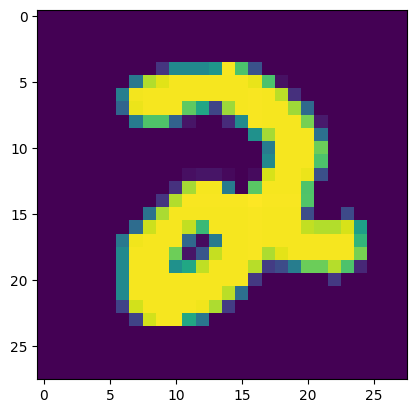

tensor(2)


In [39]:
# Testing data on the model with the correct answer bellow
a = 6
plt.imshow(X[a].view(28, 28))
plt.show()


print(torch.argmax(net(X[a].view(-1, 28*28))[0]))